In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# charts
import seaborn as sns 
import matplotlib.pyplot as plt
import squarify #TreeMap

# import graph objects as "go"

import plotly.graph_objs as go

%matplotlib inline

#ignore warning 
import warnings
warnings.filterwarnings("ignore")



In [2]:
data_import = pd.read_csv("C:\\Users\\2000p\\Downloads\\archive\\2010_2021_HS2_import.csv")
data_export = pd.read_csv("C:\\Users\\2000p\\Downloads\\archive\\2010_2021_HS2_export.csv")

In [3]:
print('export')
data_export.head(5)

export


,HSCode,Commodity,value,country,year
0,2,MEAT AND EDIBLE MEAT OFFAL.,1.40,AFGHANISTAN,2010
1,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",0.08,AFGHANISTAN,2010
2,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,3.89,AFGHANISTAN,2010
3,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",NaN,AFGHANISTAN,2010
4,6,LIVE TREES AND OTHER PLANTS; BULBS; ROOTS AND ...,NaN,AFGHANISTAN,2010


In [4]:
print('import')
data_import.head(5)

import


,HSCode,Commodity,value,country,year
0,7,EDIBLE VEGETABLES AND CERTAIN ROOTS AND TUBERS.,9.14,AFGHANISTAN,2010
1,8,EDIBLE FRUIT AND NUTS; PEEL OR CITRUS FRUIT OR...,93.82,AFGHANISTAN,2010
2,9,"COFFEE, TEA, MATE AND SPICES.",2.54,AFGHANISTAN,2010
3,12,"OIL SEEDS AND OLEA. FRUITS; MISC. GRAINS, SEED...",0.32,AFGHANISTAN,2010
4,13,"LAC; GUMS, RESINS AND OTHER VEGETABLE SAPS AND...",37.67,AFGHANISTAN,2010


In [5]:
print('export describe')
data_export.describe()

export describe


,HSCode,value,year
count,184755.000000,165497.000000,184755.000000
mean,51.232291,22.233844,2015.590344
std,27.965879,223.795216,3.444532
min,1.000000,0.000000,2010.000000
25%,28.000000,0.030000,2013.000000
50%,52.000000,0.370000,2016.000000
75%,74.000000,3.870000,2019.000000
max,99.000000,19805.170000,2021.000000


In [6]:
print('import describe')
data_import.describe()

import describe


,HSCode,value,year
count,101051.000000,85306.000000,101051.000000
mean,53.655501,64.183018,2015.541143
std,27.627867,680.976703,3.464244
min,1.000000,0.000000,2010.000000
25%,30.000000,0.030000,2012.000000
50%,54.000000,0.380000,2016.000000
75%,78.000000,5.040000,2019.000000
max,99.000000,32781.570000,2021.000000


In [7]:
print('export dataset summary')
data_export.info()

export dataset summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184755 entries, 0 to 184754
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     184755 non-null  int64  
 1   Commodity  184755 non-null  object 
 2   value      165497 non-null  float64
 3   country    184755 non-null  object 
 4   year       184755 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 7.0+ MB


In [8]:
print('import dataset summary')
data_import.info()

import dataset summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101051 entries, 0 to 101050
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   HSCode     101051 non-null  int64  
 1   Commodity  101051 non-null  object 
 2   value      85306 non-null   float64
 3   country    101051 non-null  object 
 4   year       101051 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 3.9+ MB


In [9]:
#import data with NAN values
print('null values in import dataset')
data_import.isnull().sum()

null values in import dataset


HSCode           0
Commodity        0
value        15745
country          0
year             0
dtype: int64

In [10]:
#export data with NAN values
print('null values in export dataset')
display(data_export.isnull().sum())

null values in export dataset


HSCode           0
Commodity        0
value        19258
country          0
year             0
dtype: int64

In [11]:
#export data with zeros
print('export data with 0$ of trade value')
display(data_export[data_export.value == 0].head(3))

export data with 0$ of trade value


,HSCode,Commodity,value,country,year
14,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN,2010
21,23,RESIDUES AND WASTE FROM THE FOOD INDUSTRIES; P...,0.0,AFGHANISTAN,2010
31,35,ALBUMINOIDAL SUBSTANCES; MODIFIED STARCHES; GL...,0.0,AFGHANISTAN,2010


In [12]:
#import data with zeros
print('import data with 0$ of trade value')
display(data_import[data_import.value == 0].head(3))

import data with 0$ of trade value


,HSCode,Commodity,value,country,year
5,16,"PREPARATIONS OF MEAT, OF FISH OR OF CRUSTACEAN...",0.0,AFGHANISTAN,2010
6,18,COCOA AND COCOA PREPARATIONS.,0.0,AFGHANISTAN,2010
9,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",0.0,AFGHANISTAN,2010


In [13]:
#import data where countryname is not given
print('import data with missing country')
data_import[data_import.country == "UNSPECIFIED"].head(5)

import data with missing country


,HSCode,Commodity,value,country,year
7839,1,LIVE ANIMALS.,0.08,UNSPECIFIED,2010
7840,2,MEAT AND EDIBLE MEAT OFFAL.,NaN,UNSPECIFIED,2010
7841,3,"FISH AND CRUSTACEANS, MOLLUSCS AND OTHER AQUAT...",1.02,UNSPECIFIED,2010
7842,4,DAIRY PRODUCE; BIRDS' EGGS; NATURAL HONEY; EDI...,0.12,UNSPECIFIED,2010
7843,5,"PRODUCTS OF ANIMAL ORIGIN, NOT ELSEWHERE SPECI...",0.18,UNSPECIFIED,2010


In [14]:
print("Duplicate imports : "+str(data_import.duplicated().sum()))
print("Duplicate exports : "+str(data_export.duplicated().sum()))

Duplicate imports : 0
Duplicate exports : 0


In [15]:
#dropping missing variables
data_import = data_import.dropna()
data_import['country'] = data_import['country'].replace({'U S A': 'USA'})
data_import = data_import.reset_index(drop=True)

data_export = data_export.dropna()
data_export['country'] = data_export['country'].replace({'U S A': 'USA'})
data_export = data_export.reset_index(drop=True)

EXPLORATORY DATA ANALYSIS(COMMODITY WISE)

In [16]:
print("Import Commodity Count : "+str(len(data_import['Commodity'].unique())))
print("Export Commodity Count : "+str(len(data_export['Commodity'].unique())))

Import Commodity Count : 98
Export Commodity Count : 98


In [17]:
#commodities imported
print('commodities imported')
df = pd.DataFrame(data_import['Commodity'].value_counts())
df.head(20)

commodities imported


,count
Commodity,
"ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS THEREOF; SOUND RECORDERS AND REPRODUCERS, TELEVISION IMAGE AND SOUND RECORDERS AND REPRODUCERS,AND PARTS.",2081
"NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHANICAL APPLIANCES; PARTS THEREOF.",1970
IRON AND STEEL,1828
ALUMINIUM AND ARTICLES THEREOF.,1716
PLASTIC AND ARTICLES THEREOF.,1712
"OPTICAL, PHOTOGRAPHIC CINEMATOGRAPHIC MEASURING, CHECKING PRECISION, MEDICAL OR SURGICAL INST. AND APPARATUS PARTS AND ACCESSORIES THEREOF;",1626
COPPER AND ARTICLES THEREOF.,1498
ARTICLES OF IRON OR STEEL,1460
WOOD AND ARTICLES OF WOOD; WOOD CHARCOAL.,1396


In [18]:
print("No of Country and territories where we are importing Comodities are "+str(len(data_import['country'].unique())))
print("No of countries and territories where we are Exporting Comodities are "+str(len(data_export['country'].unique())))

No of Country and territories where we are importing Comodities are 242
No of countries and territories where we are Exporting Comodities are 249


In [19]:
#crating dataset commodity wise
exp_comm = data_export.groupby('Commodity').agg({'value':'sum'})
exp_comm = exp_comm.sort_values(by = 'value', ascending = False)
exp_comm = exp_comm[:20]

imp_comm = data_import.groupby('Commodity').agg({'value':'sum'})
imp_comm = imp_comm.sort_values(by = 'value', ascending = False)
imp_comm = imp_comm[:20]

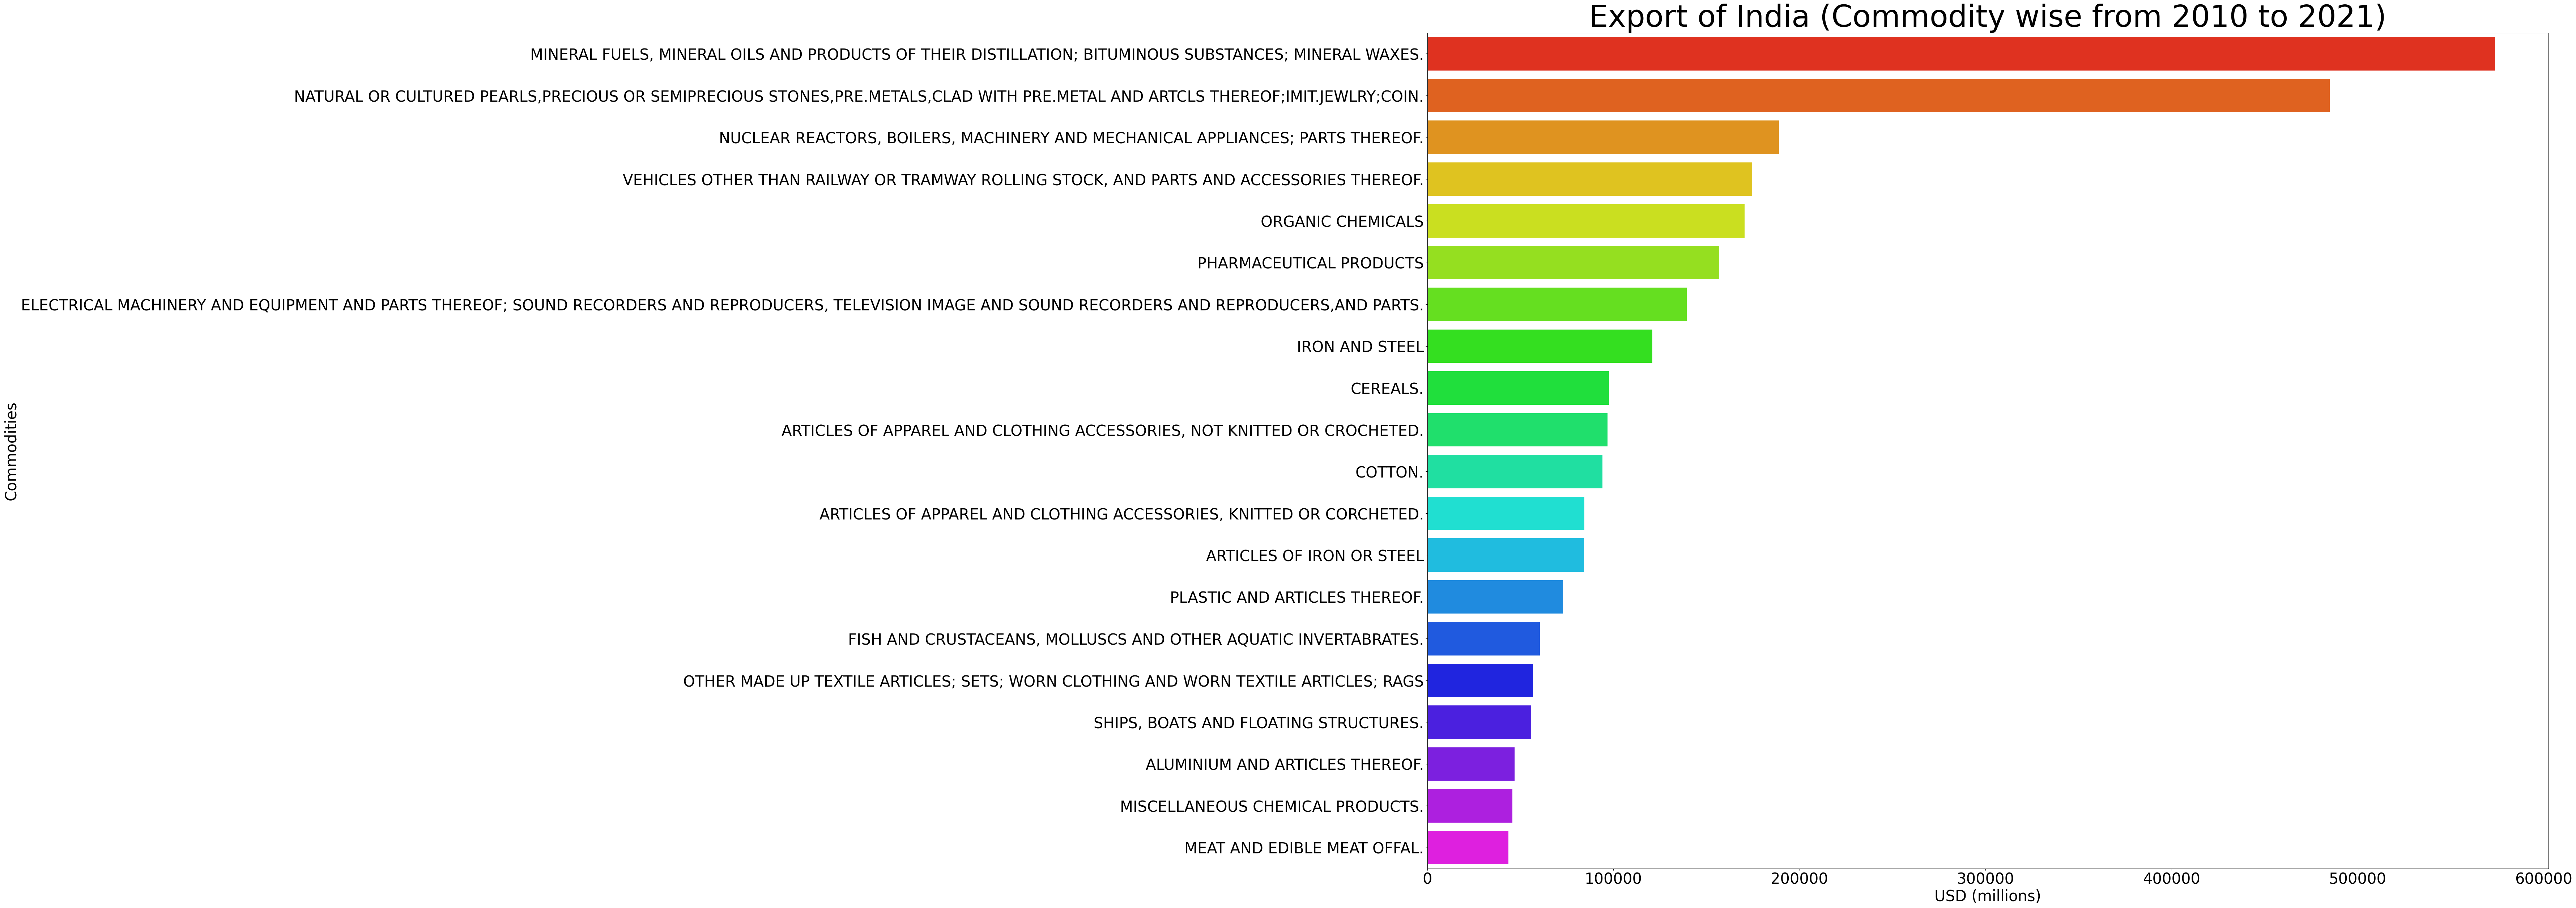

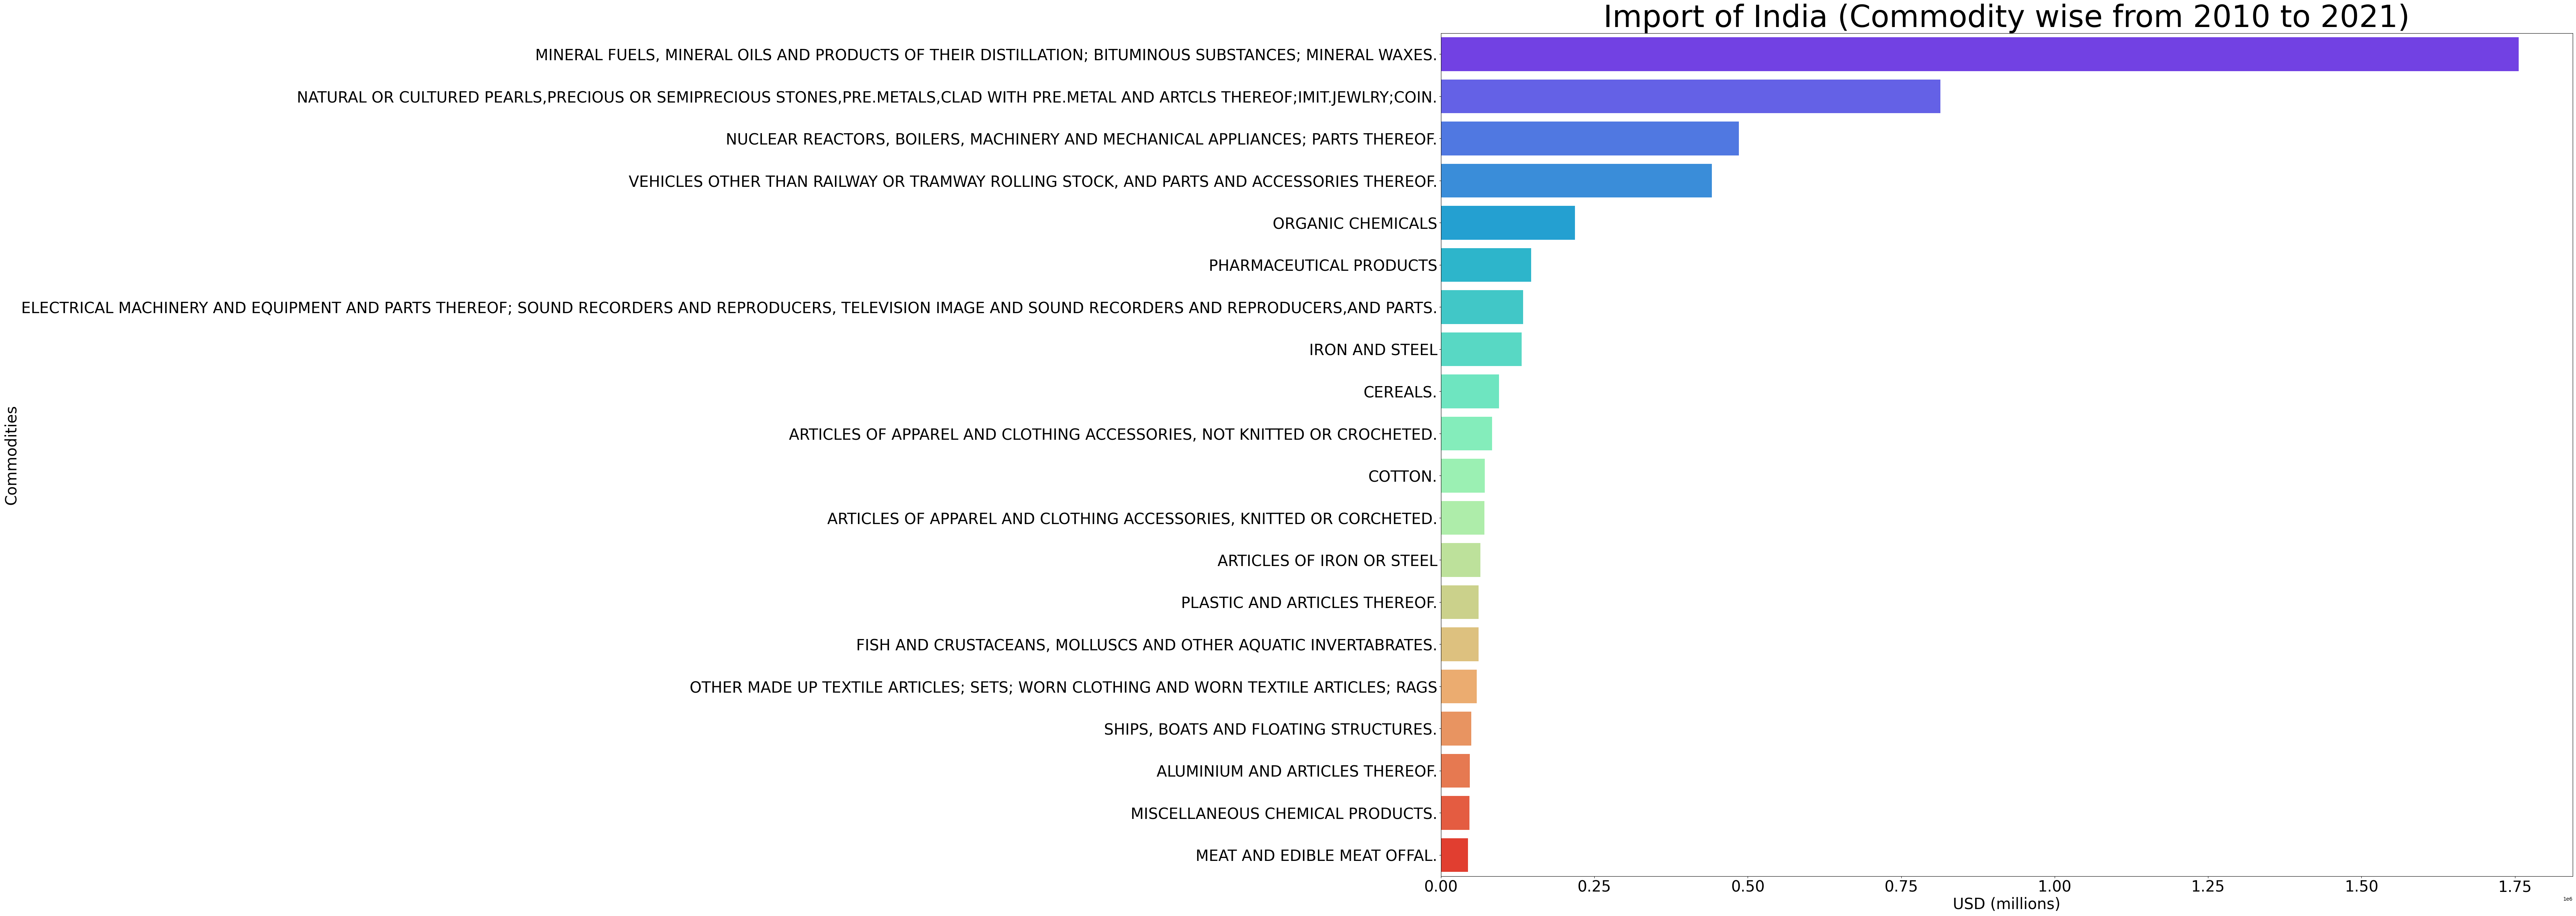

In [20]:
#visualization
def bar_plot(x,y, xlabel, ylabel, label, color):
    global ax
    font_size = 30
    title_size = 60
    plt.rcParams['figure.figsize'] = (40, 30)
    ax = sns.barplot(x=x, y=y, palette = color)
    ax.set_xlabel(xlabel = xlabel, fontsize = font_size)
    ax.set_ylabel(ylabel = ylabel, fontsize = font_size)
    ax.set_title(label = label, fontsize = title_size)
    plt.xticks(fontsize=30)
    plt.yticks(fontsize=30)
    plt.show()
    
bar_plot(exp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Export of India (Commodity wise from 2010 to 2021)', 'gist_rainbow')
bar_plot(imp_comm.value, exp_comm.index, 'USD (millions)', 'Commodities', 'Import of India (Commodity wise from 2010 to 2021)', 'rainbow')

YEAR WISE ANALYSIS

In [21]:
#year wise analysis
export_year = data_export.groupby('year').agg({'value': 'sum'})
export_year = export_year.rename(columns={'value': 'Export'})
import_year = data_import.groupby('year').agg({'value': 'sum'})
import_year = import_year.rename(columns={'value': 'Import'})

#change in the import export values
export_year['Export Growth Rate'] = export_year.pct_change().mul(100)
import_year['Import Growth Rate'] = import_year.pct_change().mul(100)

#deficit
total_year = pd.concat([export_year, import_year], axis = 1)
total_year['Trade Deficit'] = export_year.Export-import_year.Import
#Export/Import and Trade Balance of India
display(total_year)

#Descriptive statistics
display(total_year.describe())

,Export,Export Growth Rate,Import,Import Growth Rate,Trade Deficit
year,,,,,
2010,249801.18,NaN,369762.25,NaN,-119961.07
2011,305948.28,22.476715,489311.81,32.331467,-183363.53
2012,300384.32,-1.818595,490730.07,0.289848,-190345.75
2013,314388.61,4.662124,450192.99,-8.260566,-135804.38
2014,310321.02,-1.293810,448026.63,-0.481207,-137705.61
2015,262274.30,-15.482909,381000.97,-14.960196,-118726.67
2016,275835.27,5.170529,384350.29,0.879084,-108515.02
2017,303507.85,10.032285,465574.02,21.132735,-162066.17
2018,330058.64,8.747975,514071.33,10.416670,-184012.69


,Export,Export Growth Rate,Import,Import Growth Rate,Trade Deficit
count,12.000000,11.000000,12.000000,11.000000,12.000000
mean,306636.203333,5.924614,456266.375000,6.564123,-149630.171667
std,43052.939353,16.288938,69331.700692,21.991460,33102.919639
min,249801.180000,-15.482909,369762.250000,-16.910148,-191061.040000
25%,287800.912500,-3.441802,391909.307500,-7.959477,-183525.820000
50%,304728.065000,4.662124,457883.505000,0.289848,-149533.110000
75%,313603.007500,9.390130,489666.375000,15.774703,-119652.470000
max,421984.370000,44.619470,613045.410000,55.426057,-102639.520000


In [22]:
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)


layout = go.Layout(hovermode= 'closest', title = 'Export/Import of Indian Trade from 2010 to 2021' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [23]:
# create trace1
trace1 = go.Scatter(
                x = total_year.index,
                y = total_year['Export Growth Rate'],
                name = "Export Growth Rate",
                line_color='deepskyblue',
                opacity=0.8,
                text = total_year['Export Growth Rate'])
# create trace2 
trace2 = go.Scatter(
                x = total_year.index,
                y = total_year['Import Growth Rate'],
                name = "Import Growth Rate",
                line_color='dimgray',
                opacity=0.8,
                text = total_year['Import Growth Rate'])

layout = go.Layout(hovermode= 'closest', title = 'Rate of Export/Import percent change in Indian Trade from 2010 to 2021' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'Export Growth Rate'))
fig = go.Figure(data = [trace1, trace2], layout = layout)
fig.show()

In [24]:
trace1 = go.Bar(
                x = total_year.index,
                y = total_year.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_year.index,
                y = total_year.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)
# create trace3
trace3 = go.Bar(
                x = total_year.index,
                y = total_year['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2021' , xaxis = dict(title = 'Year'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

COUNTRY WISE ANALYSIS

In [25]:
exp_country = data_export.groupby('country').agg({'value':'sum'})
exp_country = exp_country.rename(columns={'value': 'Export'})
exp_country = exp_country.sort_values(by = 'Export', ascending = False)
exp_country = exp_country[:20]

imp_country = data_import.groupby('country').agg({'value':'sum'})
imp_country = imp_country.rename(columns={'value': 'Import'})
imp_country = imp_country.sort_values(by = 'Import', ascending = False)
imp_country = imp_country[:20]

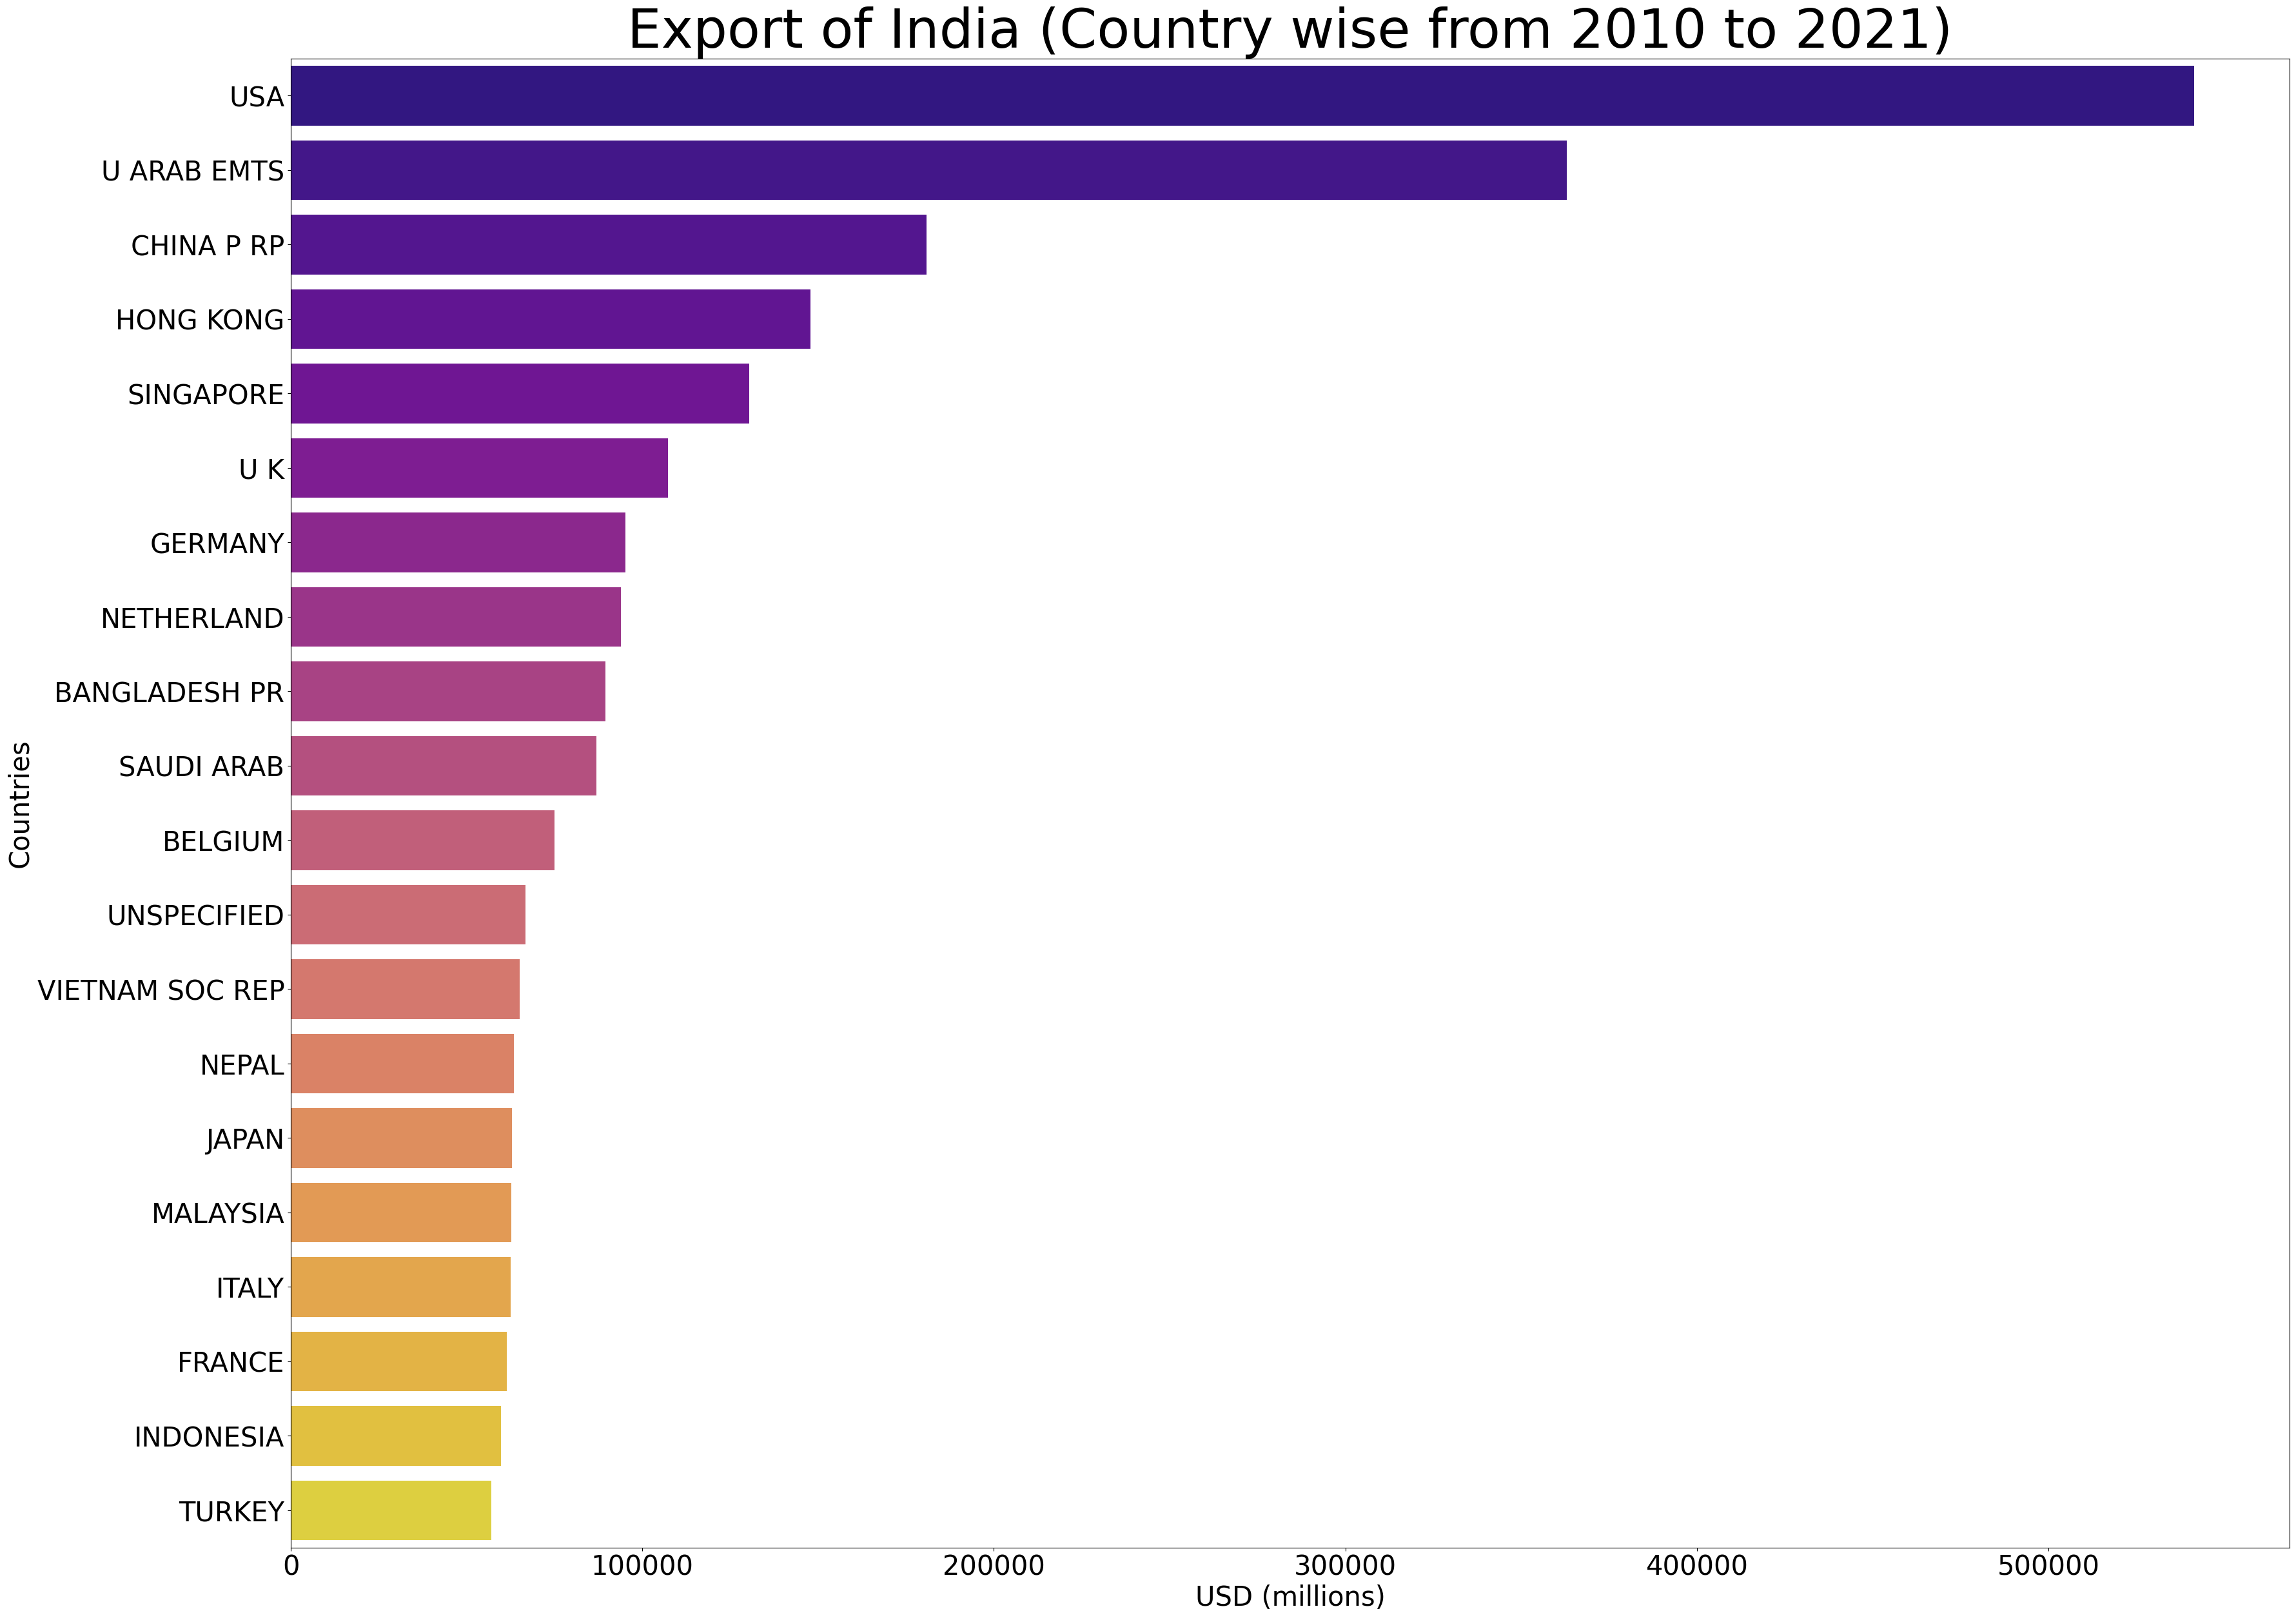

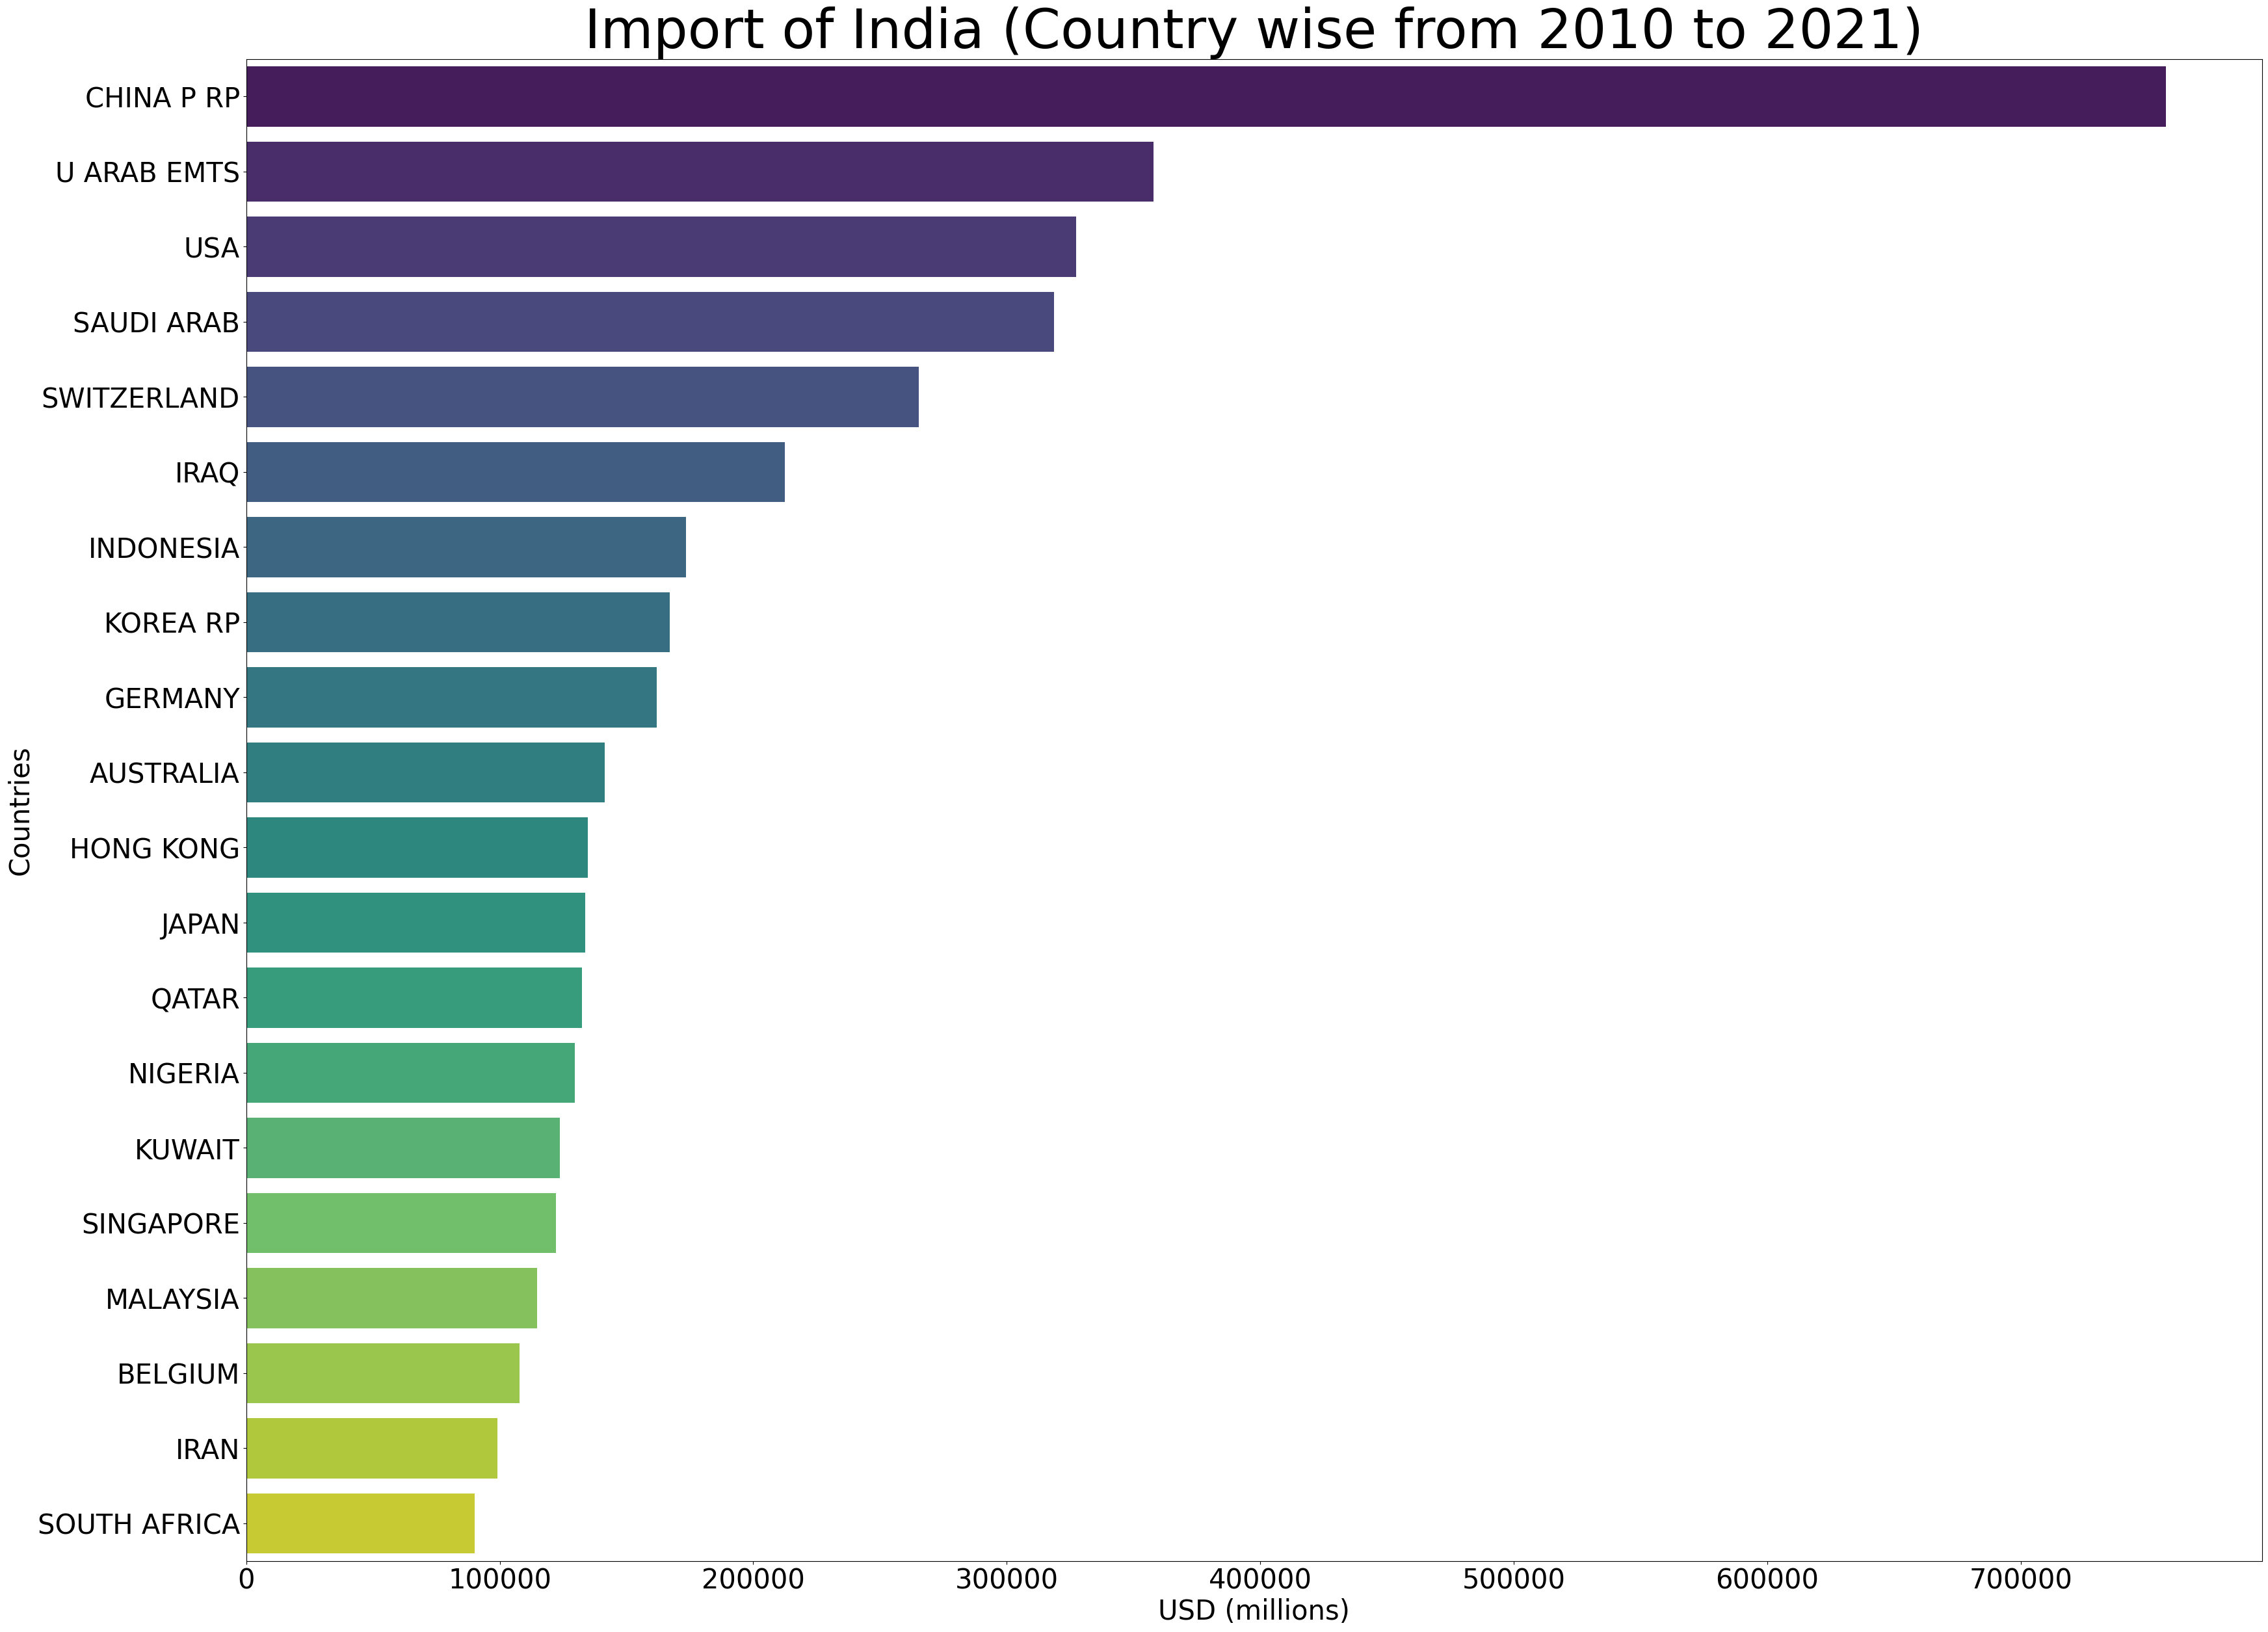

In [26]:
bar_plot(exp_country.Export, exp_country.index, 'USD (millions)', 'Countries', 'Export of India (Country wise from 2010 to 2021)', 'plasma')
bar_plot(imp_country.Import, imp_country.index, 'USD (millions)', 'Countries', 'Import of India (Country wise from 2010 to 2021)', 'viridis')

In [27]:
total_country = pd.concat([exp_country, imp_country], axis = 1)
total_country['Trade Deficit'] = exp_country.Export - imp_country.Import
total_country = total_country.sort_values(by = 'Trade Deficit', ascending = False)
total_country = total_country[:11]

display(total_country)
display(total_country.describe())

,Export,Import,Trade Deficit
country,,,
USA,541487.45,327297.77,214189.68
HONG KONG,147807.24,134746.85,13060.39
SINGAPORE,130427.76,122056.32,8371.44
U ARAB EMTS,362951.83,357998.58,4953.25
BELGIUM,75098.44,107729.11,-32630.67
MALAYSIA,62794.30,114721.33,-51927.03
GERMANY,95153.81,161966.07,-66812.26
JAPAN,62953.11,133763.17,-70810.06
INDONESIA,59775.33,173398.95,-113623.62


,Export,Import,Trade Deficit
count,11.000000,11.000000,11.000000
mean,164196.544545,246327.059091,-82130.514545
std,152860.567187,193598.766594,195967.462606
min,59775.330000,107729.110000,-576354.870000
25%,69025.775000,127909.745000,-92216.840000
50%,95153.810000,161966.070000,-51927.030000
75%,164336.150000,322998.670000,6662.345000
max,541487.450000,757219.930000,214189.680000


In [28]:
trace1 = go.Bar(
                x = total_country.index,
                y = total_country.Export,
                name = "Export",
                marker = dict(color = 'rgb(55, 83, 109)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Export)
# create trace2 
trace2 = go.Bar(
                x = total_country.index,
                y = total_country.Import,
                name = "Import",
                marker = dict(color = 'rgb(26, 118, 255)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year.Import)
# create trace3
trace3 = go.Bar(
                x = total_country.index,
                y = total_country['Trade Deficit'],
                name = "Trade Deficit",
                marker = dict(color = 'crimson',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = total_year['Trade Deficit'])

layout = go.Layout(hovermode= 'closest', title = 'Export/Import and Trade Deficit of Indian Trade from 2010 to 2018(Country Wise)' , xaxis = dict(title = 'Country'), yaxis = dict(title = 'USD (millions)'))
fig = go.Figure(data = [trace1, trace2, trace3], layout = layout)
fig.show()

In [29]:
df3=data_import.groupby(["Commodity",'country']).agg({'value':'sum'})
df4=data_export.groupby(['Commodity','country']).agg({'value':'sum'})

In [30]:

df3 = df3.sort_values(by='value', ascending = False)
df3 = df3[:10]

df4 = df4.sort_values(by='value', ascending = False)
df4 = df4[:10]
print('import')
df3



import


value
Commodity                                          country               
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE... SAUDI ARAB   268985.43
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC... SWITZERLAND  240373.46
ELECTRICAL MACHINERY AND EQUIPMENT AND PARTS TH... CHINA P RP   231732.74
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE... IRAQ         211165.21
                                                   U ARAB EMTS  154705.38
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC... U ARAB EMTS  147158.19
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN... CHINA P RP   143204.20
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE... NIGERIA      127419.22
                                                   QATAR        117634.48
                                                   KUWAIT       109543.85

In [31]:
print('export')
df4

export


value
Commodity                                          country               
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC... U ARAB EMTS  147377.49
                                                   HONG KONG    129056.04
                                                   USA          106652.20
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE... SINGAPORE     70291.35
                                                   U ARAB EMTS   63795.90
PHARMACEUTICAL PRODUCTS                            USA           54840.37
MINERAL FUELS, MINERAL OILS AND PRODUCTS OF THE... NETHERLAND    41340.86
NUCLEAR REACTORS, BOILERS, MACHINERY AND MECHAN... USA           33237.42
MISCELLANEOUS GOODS.                               UNSPECIFIED   30250.84
NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPREC... BELGIUM       30001.25

In [32]:
expensive_import = data_import[data_import.value>1000]
expensive_import.head(10)

,HSCode,Commodity,value,country,year
30,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1789.77,ALGERIA,2010
51,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",5089.14,ANGOLA,2010
169,26,"ORES, SLAG AND ASH.",1293.49,AUSTRALIA,2010
170,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",4950.11,AUSTRALIA,2010
212,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",3047.85,AUSTRALIA,2010
583,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",7061.29,BELGIUM,2010
729,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",1733.66,BRAZIL,2010
1022,26,"ORES, SLAG AND ASH.",1314.92,CHILE,2010
1096,29,ORGANIC CHEMICALS,3853.42,CHINA P RP,2010
1098,31,FERTILISERS.,1517.44,CHINA P RP,2010


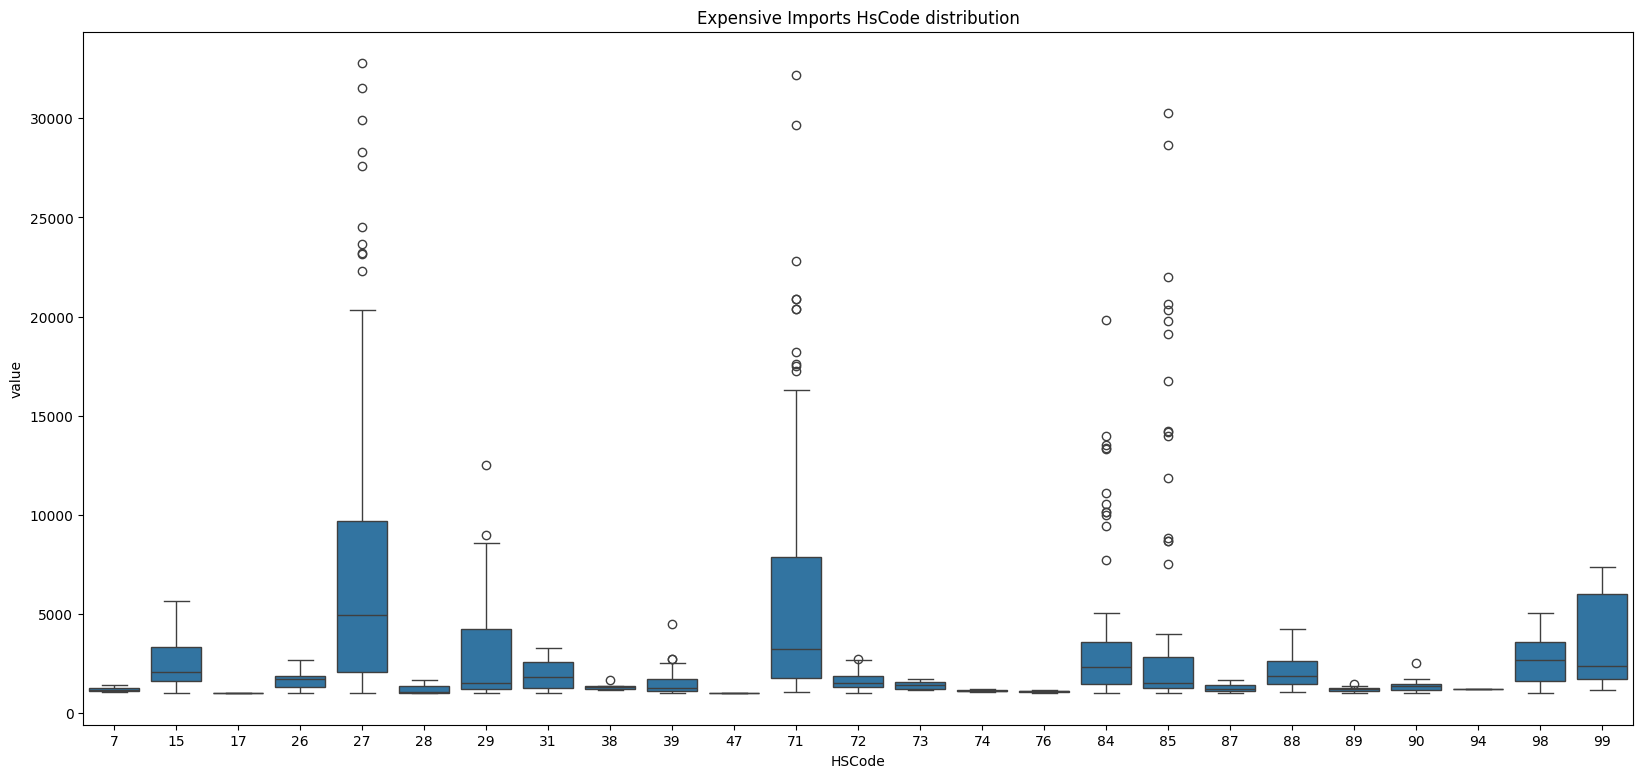

In [33]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="HSCode", y="value", data=expensive_import).set_title('Expensive Imports HsCode distribution')
plt.show()

In [34]:
df =expensive_import.groupby(['HSCode']).agg({'value': 'sum'})
df = df.sort_values(by='value')

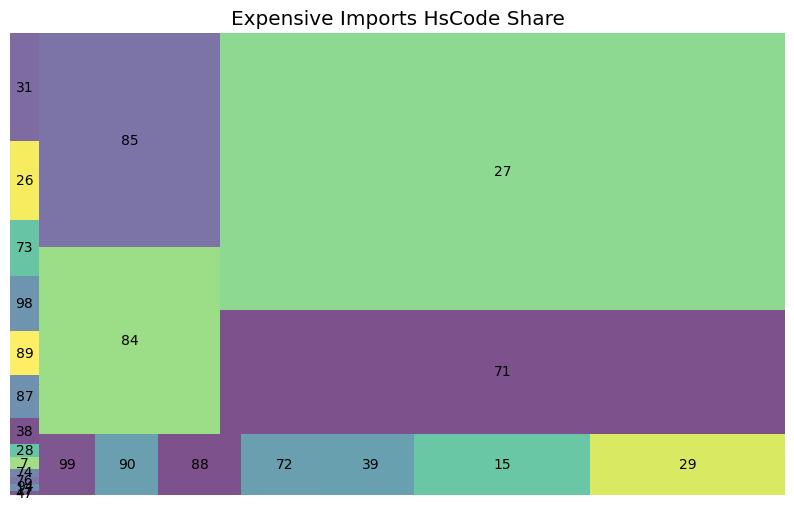

In [35]:
value=np.array(df)
commodityCode=df.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
squarify.plot(sizes=value, label=commodityCode, alpha=.7 )
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

In [36]:
len(expensive_import['country'].unique())

58

In [37]:
df1 = expensive_import.groupby(['country']).agg({'value': 'sum'})
df1 = df1.sort_values(by='value')

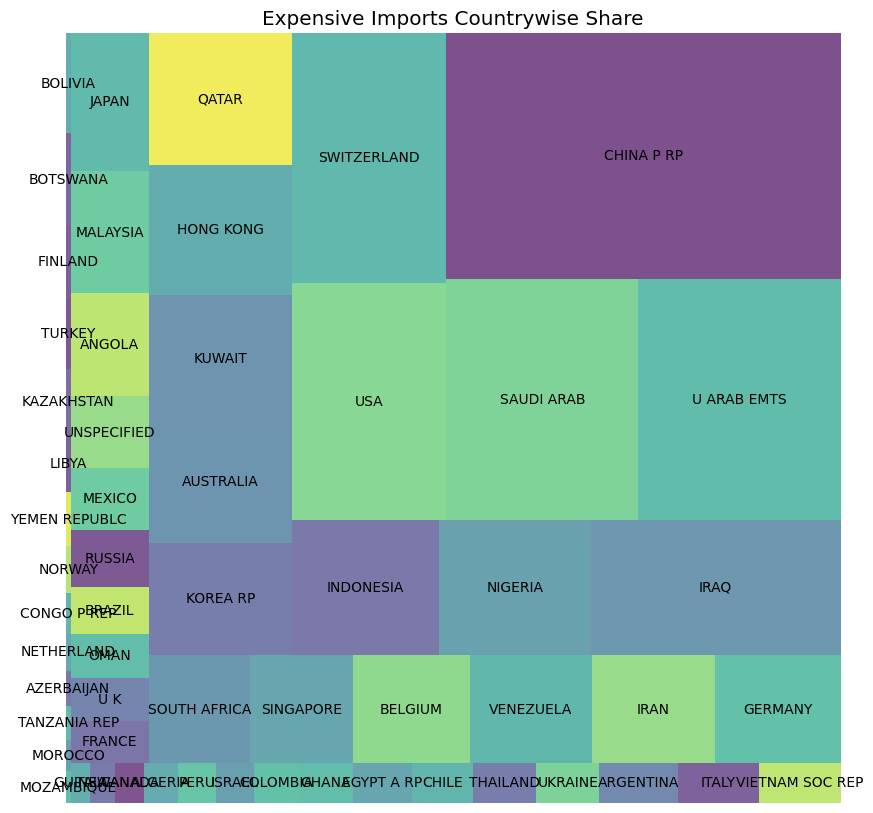

In [38]:
value=np.array(df1)
country=df1.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes=value, label=country, alpha=.7 )
plt.title("Expensive Imports Countrywise Share")
plt.axis('off')
plt.show()

In [43]:
expensive_export = data_export[data_export.value>1000]
expensive_export.head(10)

,HSCode,Commodity,value,country,year
683,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2017.73,BAHAMAS,2010
849,52,COTTON.,1081.39,BANGLADESH PR,2010
1062,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",2393.13,BELGIUM,2010
1456,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2010.06,BRAZIL,2010
2197,26,"ORES, SLAG AND ASH.",4767.11,CHINA P RP,2010
2220,52,COTTON.,1891.46,CHINA P RP,2010
2242,74,COPPER AND ARTICLES THEREOF.,1365.69,CHINA P RP,2010
3793,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2135.19,FRANCE,2010
4814,71,"NATURAL OR CULTURED PEARLS,PRECIOUS OR SEMIPRE...",8670.13,HONG KONG,2010
4980,27,"MINERAL FUELS, MINERAL OILS AND PRODUCTS OF TH...",2558.99,INDONESIA,2010


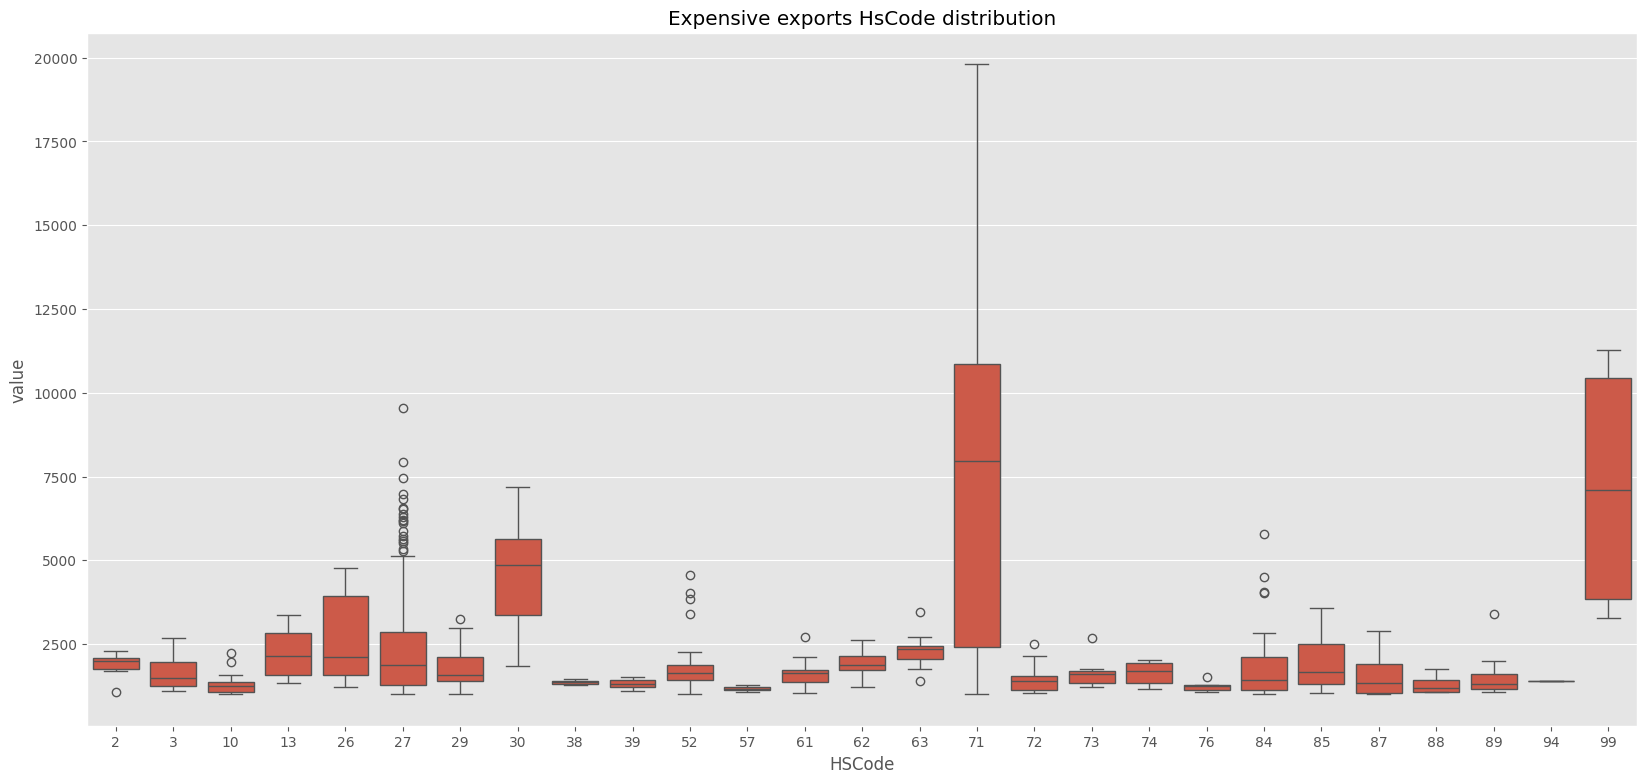

In [44]:
plt.figure(figsize=(20,9))
ax = sns.boxplot(x="HSCode", y="value", data=expensive_export).set_title('Expensive exports HsCode distribution')
plt.show()

In [46]:
dfexp =expensive_export.groupby(['HSCode']).agg({'value': 'sum'})
dfexp = df.sort_values(by='value')

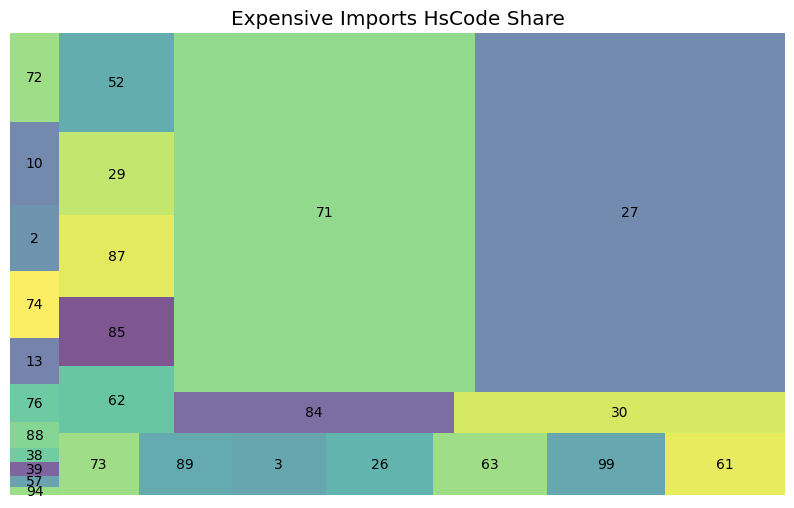

In [47]:
value=np.array(dfexp)
commodityCode=dfexp.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 6.0)
squarify.plot(sizes=value, label=commodityCode, alpha=.7 )
plt.axis('off')
plt.title("Expensive Imports HsCode Share")
plt.show()

In [48]:
len(expensive_export['country'].unique())

39

In [49]:
dfexp1 = expensive_export.groupby(['country']).agg({'value': 'sum'})
dfexp1 = df1.sort_values(by='value')

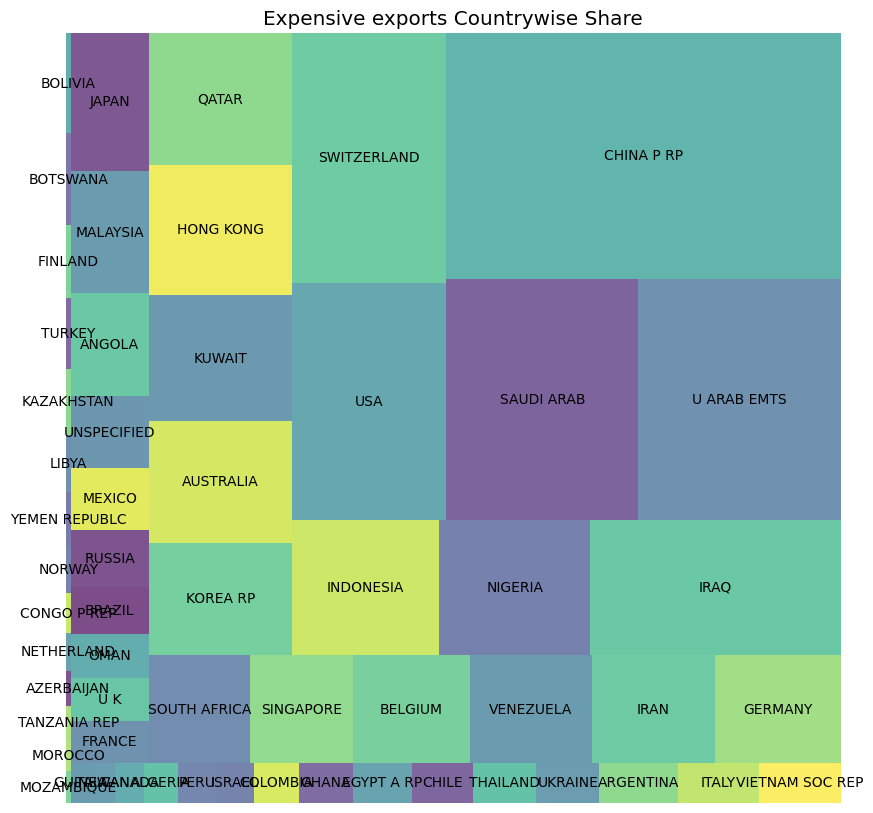

In [51]:
value=np.array(dfexp1)
country=df1.index
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 10.0)
squarify.plot(sizes=value, label=country, alpha=.7 )
plt.title("Expensive exports Countrywise Share")
plt.axis('off')
plt.show()